## **Complete MNIST handwritten digit classification in tensorflow**

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from PIL import Image

In [7]:
X=np.load("X.npy")
Y=np.load("Y.npy")
print(X.shape)
print(Y.shape)
# 5000 input data points
# each datapoint represents an image of size 20X20

(5000, 400)
(5000, 1)


### Visualising the data set
We take 64 random arrays from the data set and plot them on the axes along with their correct classification
- ndarray.T returns the transpose of the given array it is here used to straighten the images as shown

<class 'numpy.ndarray'>


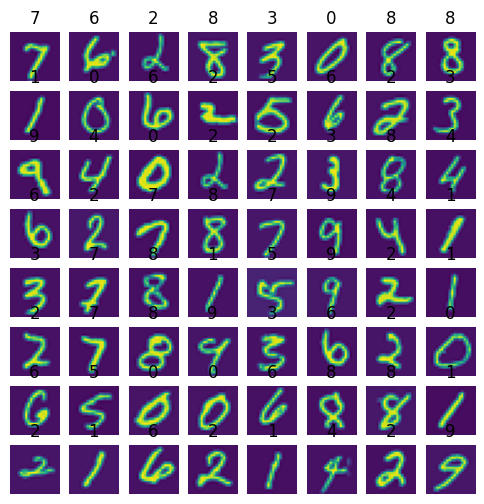

In [18]:
fig, ax=plt.subplots(nrows=8, ncols=8, sharex=True, sharey=True, figsize=(6,6))
#ax is a numpy array of plt objects of shape(8,8) 
print(type(ax[0]))

#np.ndarray.flat() returns a 1-D iterator over the numpy array which iterates the nparray as if it were a 1D array
rand_obj=np.random.RandomState(123)
for i in ax.flat:
    ind=rand_obj.randint(X.shape[0])
    img=np.reshape(X[ind],(20,20)).T
    i.imshow(img)
    i.set_title(Y[ind][0])
    i.set_axis_off()

### Splitting the data into training and testing arrays

In [22]:
# create a randomly shuffled index array
# use these indices to shuffle the given arrays
shuffle_index=np.arange(0,X.shape[0], dtype=int)
rand_obj=np.random.RandomState(123)
rand_obj.shuffle(shuffle_index) # shuffles the shuffle_index array according to the seed provided
X,Y=X[shuffle_index], Y[shuffle_index]  #X,Y have been shuffled now

X_train, Y_train= X[:3500], Y[:3500]
X_test, Y_test= X[3500:5000], Y[3500:5000]
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(3500, 400) (3500, 1) (1500, 400) (1500, 1)


### Creating the model

In [25]:
model=Sequential([tf.keras.Input(shape=(400,)),
                  Dense(units=25, activation='relu'),
                  Dense(units=15, activation='relu'),
                  Dense(units=10, activation='softmax')])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 25)             │        10,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,575 (41.31 KB)

 Trainable params: 10,575 (41.31 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(0.01))
model.fit(X_train, Y_train, epochs=20)

Epoch 1/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3283
Epoch 2/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2411
Epoch 3/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1883
Epoch 4/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1494
Epoch 5/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1354
Epoch 6/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0928
Epoch 7/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1235
Epoch 8/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1029
Epoch 9/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1196
Epoch 10/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0416
Epoch 11/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0453
Epoch 12/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0596
Epoch 13/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0527
Epoch 14/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0596
Epoch 15/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

### Testing the model

In [31]:
predictions=model.predict(X_test)
predictions.shape

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


(1500, 10)

In [50]:
final_predict=predictions.argmax(axis=1)
final_predict=np.reshape(final_predict, (1500,1))
final_predict.shape

(1500, 1)

In [53]:
count=np.sum((final_predict==Y_test))
print("accuracy of the above softmax neural network is: ", count/1500)

accuracy of the above softmax neural network is:  0.93
